#Creando nuestro propio KNN

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [35]:
dataset = {
    'k': [[1, 2], [2, 3], [3, 1]],
    'r': [[6, 5], [7, 7], [8, 6]]
}
new_point = [5, 7]

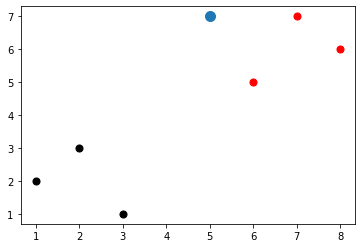

In [36]:
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100)

In [55]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):

  if len(data) >= k:
    warnings.warn('k es un valor menor que el número total de elementos a votar!!')

  distances = []
  for group in data:
    for feature in data[group]:
      #d = sqrt((feature[0] - predict[0])**2 + (feature[1] - predict[1])**2) #distancia euclídea para 2D
      #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2)) #Misma distancia euclídea pero más rápida y generalizada
      d = np.linalg.norm(np.array(feature) - np.array(predict)) #Norma de un vector. Todavía más rápido y también generalizado
      distances.append([d, group])
  
  if verbose == True:
    print(distances)

  votes = [i[1] for i in sorted(distances)[:k]] 

  if verbose == True:
    print(votes)

  vote_result = Counter(votes).most_common(1)

  if verbose == True:
    print(vote_result)

  return vote_result[0][0]  

In [38]:
result = k_nearest_neighbors(dataset, new_point)
result

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


'r'

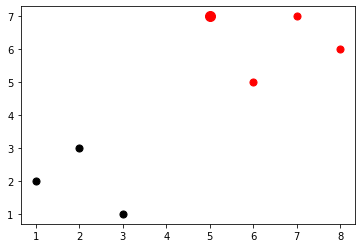

In [39]:
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color = result)

[[2.8284271247461903, 'k'], [1.4142135623730951, 'k'], [3.0, 'k'], [3.1622776601683795, 'r'], [5.0, 'r'], [5.385164807134504, 'r']]
['k', 'k', 'k']
[('k', 3)]


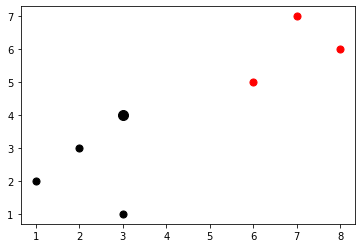

In [40]:
new_point = [3, 4]
result = k_nearest_neighbors(dataset, new_point)
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color = result)

# Aplicando nuestro KNN al Dataset del Cancer

In [41]:
import pandas as pd
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/cancer/breast-cancer-wisconsin.data.txt'
df = pd.read_csv(url, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [42]:
df.replace('?', -99999, inplace = True)
df.columns = ['name', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'class']
df.drop(['name'], axis = 1, inplace = True)
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [45]:
full_data = df.astype(float).values.tolist()
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [46]:
import random
random.shuffle(full_data)
test_size = 0.2

In [47]:
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}

In [48]:
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

In [49]:
for i in train_data:
  train_set[i[-1]].append(i[:-1])

for i in test_data:
  test_set[i[-1]].append(i[:-1])

In [50]:
train_set

{2: [[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, -99999.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [5.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0],
  [2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0,

In [51]:
test_set

{2: [[2.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, -99999.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 4.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.0],
  [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 7.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 6.0, 3.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 7.0, 2.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0,

In [56]:
correct = 0
total = 0
for group in test_set:
  for data in test_set[group]:
    vote = k_nearest_neighbors(train_set, data, k = 5, verbose = False)
    if group == vote:
      correct += 1
    total += 1
print('Eficacia del KNN = ', correct/total)

Eficacia del KNN =  0.9712230215827338
